In [1]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

In [2]:
#Generate Data
def true_function(X):
    return 0.5 * X**3 - X**2 + 2*X + 3

X = np.linspace(-3, 3, 100)
y = true_function(X) + np.random.normal(0, 5, size=X.shape)

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.3, random_state=42)

In [3]:
#Ridge Model
ridge_model = Pipeline([
    ("poly", PolynomialFeatures(degree=10)),
    ("ridge", Ridge(alpha=10))
])

ridge_model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=10)),
                ('ridge', Ridge(alpha=10))])

In [4]:
#Lasso Model
lasso_model = Pipeline([
    ("poly", PolynomialFeatures(degree=10)),
    ("lasso", Lasso(alpha=0.1, max_iter=10000))
])

lasso_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.335e+02, tolerance: 6.990e-01
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('poly', PolynomialFeatures(degree=10)),
                ('lasso', Lasso(alpha=0.1, max_iter=10000))])

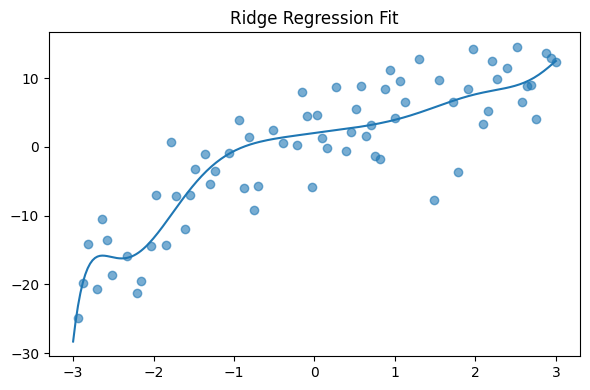

In [5]:
#Plot Ridge Fit
X_plot = np.linspace(-3, 3, 200).reshape(-1, 1)

plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, alpha=0.6)
plt.plot(X_plot, ridge_model.predict(X_plot))
plt.title("Ridge Regression Fit")
plt.tight_layout()
plt.show()

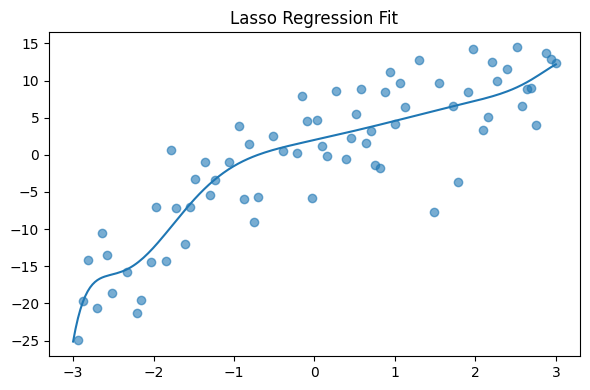

In [6]:
#Plot Lasso Fit
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, alpha=0.6)
plt.plot(X_plot, lasso_model.predict(X_plot))
plt.title("Lasso Regression Fit")
plt.tight_layout()
plt.show()

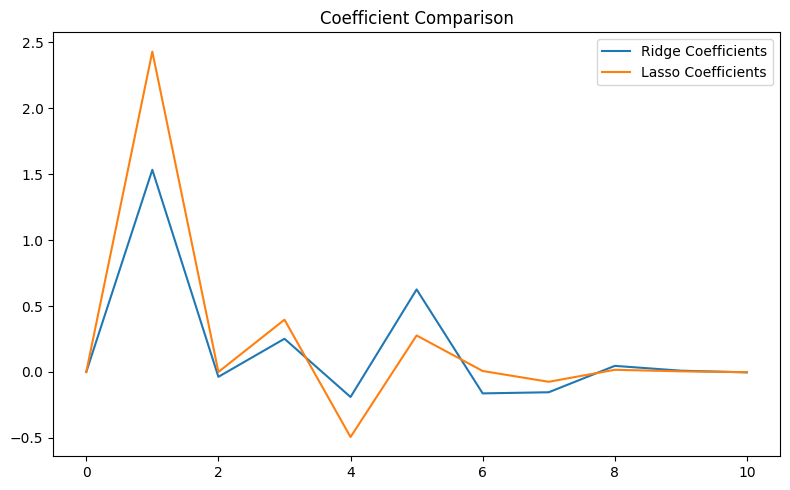

In [7]:
#Coefficient Comparison
ridge_coefs = ridge_model.named_steps["ridge"].coef_
lasso_coefs = lasso_model.named_steps["lasso"].coef_

plt.figure(figsize=(8,5))
plt.plot(ridge_coefs, label="Ridge Coefficients")
plt.plot(lasso_coefs, label="Lasso Coefficients")
plt.legend()
plt.title("Coefficient Comparison")
plt.tight_layout()
plt.show()